In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import torch
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

dataset_path = "/content/drive/MyDrive/539/Combined Dataset"

transforms = transforms.Compose([
    transforms.Resize((224, 224)), #resnet input size
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# sets up data based on folder
train_dataset = ImageFolder(dataset_path + "/Train", transform=transforms)
test_dataset = ImageFolder(dataset_path + "/Test", transform=transforms)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

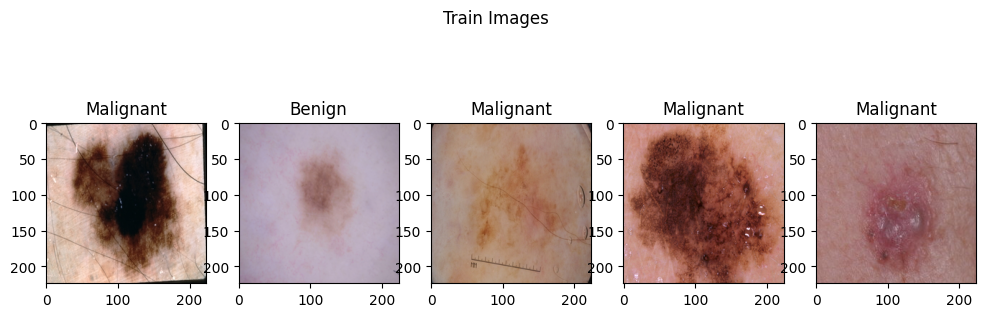

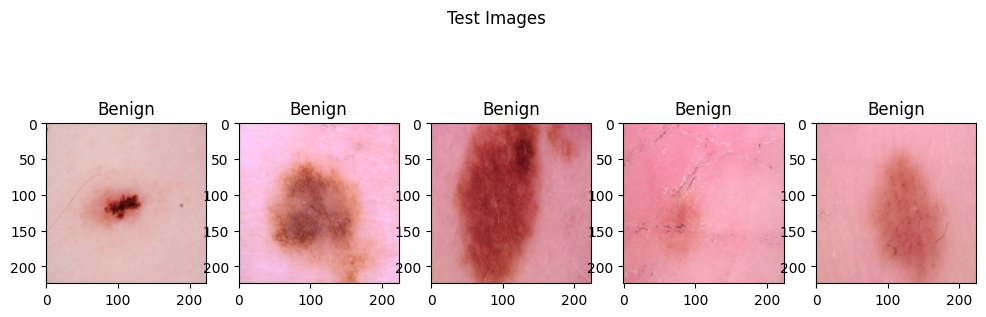

In [ ]:
# loop through and check if we correctly have data
def show_images(images, labels, title, class_names=['Benign', 'Malignant']):

    # de-normalizes the images so they are displayed correctly
    mean = torch.tensor([0.485, 0.456, 0.406])
    std = torch.tensor([0.229, 0.224, 0.225])
    images = images * std.view(1, 3, 1, 1) + mean.view(1, 3, 1, 1)

    plt.figure(figsize=(12, 4))
    for i in range(5):
        img = images[i]
        label = labels[i].item()
        # convert so we can show image
        img = img.permute(1, 2, 0).numpy()
        plt.subplot(1, 5, i+1)
        plt.imshow(img)
        plt.title(class_names[label])
    plt.suptitle(title)
    plt.show()

# iterate randomly to show labeled images
train_images, train_labels = next(iter(train_loader))
show_images(train_images, train_labels, "Train Images")
test_images, test_labels = next(iter(test_loader))
show_images(test_images, test_labels, "Test Images")

In [ ]:
import torchvision
import torch.nn as nn

model = torchvision.models.resnet50(pretrained=True)

# freezes the layers
for param in model.parameters():
    param.requires_grad = False

# changes final fc layer to 2
input_features = model.fc.in_features
model.fc = nn.Linear(input_features, 2)

print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
# Hyperparameters
lr = 0.01
num_epochs = 50

In [ ]:
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Currently using device: {device}")
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum=0.9)

def accuracy(pred, labels):
    return (pred.argmax(-1) == labels).float().mean()

def train_model(model, criterion, optimizer, train_loader, test_loader):
    for epoch in range(num_epochs):
        model.train()
        losses = []
        for images, labels in train_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            losses.append(loss.item())
        print(f"Epoch {epoch+1}, Train Loss: {np.mean(losses):.3f}")

        model.eval()
        accuracies = []
        with torch.no_grad():
            for images, labels in test_loader:
                images = images.to(device)
                labels = labels.to(device)
                pred = model(images)
                acc = accuracy(pred, labels)
                accuracies.append(acc.item())
        print(f"Test Accuracy: {100 * np.mean(accuracies)}%")


Currently using device: cuda


In [ ]:
train_model(model, criterion, optimizer, train_loader, test_loader)

Epoch 1, Train Loss: 0.800
Test Accuracy: 76.75%
Epoch 2, Train Loss: 0.681
Test Accuracy: 70.75%
Epoch 3, Train Loss: 0.627
Test Accuracy: 79.875%
Epoch 4, Train Loss: 0.631
Test Accuracy: 77.75%
Epoch 5, Train Loss: 0.516
Test Accuracy: 77.875%
Epoch 6, Train Loss: 0.708
Test Accuracy: 76.5%
Epoch 7, Train Loss: 0.484
Test Accuracy: 78.75%
Epoch 8, Train Loss: 0.686
Test Accuracy: 78.125%
Epoch 9, Train Loss: 0.691
Test Accuracy: 78.375%
Epoch 10, Train Loss: 0.519
Test Accuracy: 79.875%
Epoch 11, Train Loss: 0.556
Test Accuracy: 78.625%
Epoch 12, Train Loss: 0.604
Test Accuracy: 79.375%
Epoch 13, Train Loss: 0.544
Test Accuracy: 75.75%
Epoch 14, Train Loss: 0.538
Test Accuracy: 76.875%
Epoch 15, Train Loss: 0.524
Test Accuracy: 80.875%
Epoch 16, Train Loss: 0.465
Test Accuracy: 79.375%
Epoch 17, Train Loss: 0.702
Test Accuracy: 78.625%
Epoch 18, Train Loss: 0.592
Test Accuracy: 71.625%
Epoch 19, Train Loss: 0.524
Test Accuracy: 72.125%
Epoch 20, Train Loss: 0.614
Test Accuracy: 81.1

In [ ]:
vgg_model = torchvision.models.vgg16(pretrained=True)

# freezes the layers
for param in vgg_model.parameters():
    param.requires_grad = False

# changes final classifier layer to 2
vgg_model.classifier[6] = nn.Linear(4096, 2)

print(vgg_model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
vgg_model = vgg_model.to(device)
optimizer_vgg = torch.optim.SGD(vgg_model.parameters(), lr=lr, momentum=0.9)
train_model(vgg_model, criterion, optimizer_vgg, train_loader, test_loader)

Epoch 1, Train Loss: 1.448
Test Accuracy: 69.25%
Epoch 2, Train Loss: 1.946
Test Accuracy: 75.375%
Epoch 3, Train Loss: 1.907
Test Accuracy: 77.25%
Epoch 4, Train Loss: 2.360
Test Accuracy: 76.75%
Epoch 5, Train Loss: 2.092
Test Accuracy: 74.625%
Epoch 6, Train Loss: 2.027
Test Accuracy: 77.75%
Epoch 7, Train Loss: 1.964
Test Accuracy: 79.0%
Epoch 8, Train Loss: 2.051
Test Accuracy: 77.875%
Epoch 9, Train Loss: 2.260
Test Accuracy: 70.0%
Epoch 10, Train Loss: 2.112
Test Accuracy: 75.375%
Epoch 11, Train Loss: 2.170
Test Accuracy: 77.125%
Epoch 12, Train Loss: 2.224
Test Accuracy: 74.375%
Epoch 13, Train Loss: 2.328
Test Accuracy: 75.875%
Epoch 14, Train Loss: 2.077
Test Accuracy: 76.75%


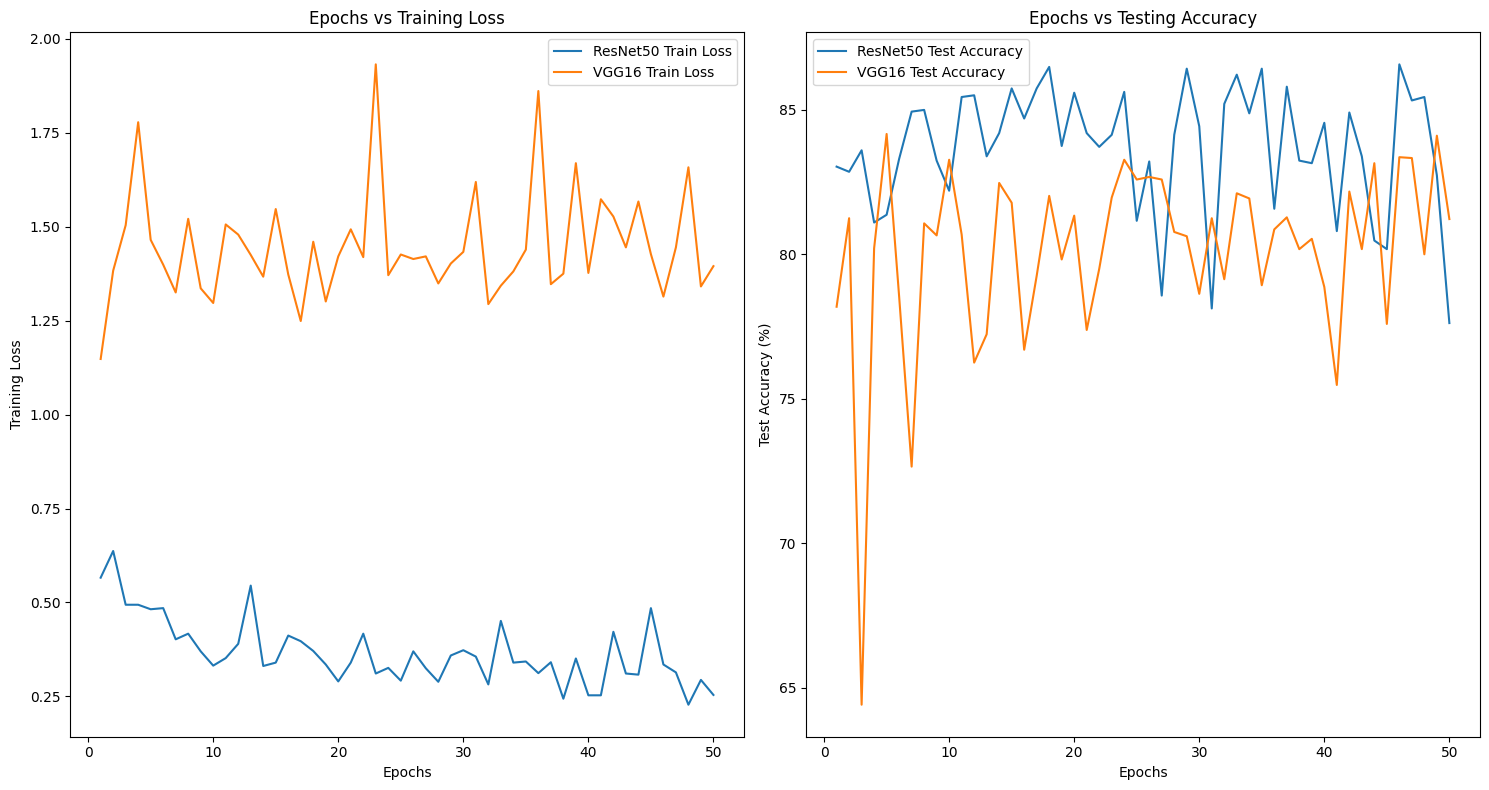

In [ ]:
import re
import matplotlib.pyplot as plt

def search_output(output):
    epochs = []
    losses = []
    accuracies = []

    for line in output.strip().split('\n'):
        if "Epoch" in line:
            epoch_search = re.search(r"Epoch (\d+)", line)
            loss_search = re.search(r"Train Loss: ([\d.]+)", line)
            epochs.append(int(epoch_search.group(1)))
            losses.append(float(loss_search.group(1)))
        elif "Test Accuracy" in line:
            acc_search = re.search(r"Test Accuracy: ([\d.]+)%", line)
            accuracies.append(float(acc_search.group(1)))

    return epochs, losses, accuracies

# resnet50 output
output_model = """
Epoch 1, Train Loss: 0.566
Test Accuracy: 83.03571428571429%
Epoch 2, Train Loss: 0.637
Test Accuracy: 82.85714302744184%
Epoch 3, Train Loss: 0.494
Test Accuracy: 83.60119064648947%
Epoch 4, Train Loss: 0.494
Test Accuracy: 81.10119047619048%
Epoch 5, Train Loss: 0.482
Test Accuracy: 81.36904778934661%
Epoch 6, Train Loss: 0.485
Test Accuracy: 83.30357159887042%
Epoch 7, Train Loss: 0.402
Test Accuracy: 84.94047636077518%
Epoch 8, Train Loss: 0.417
Test Accuracy: 85.00000011353266%
Epoch 9, Train Loss: 0.370
Test Accuracy: 83.24404756228128%
Epoch 10, Train Loss: 0.332
Test Accuracy: 82.20238089561462%
Epoch 11, Train Loss: 0.352
Test Accuracy: 85.44642868496123%
Epoch 12, Train Loss: 0.390
Test Accuracy: 85.50595243771872%
Epoch 13, Train Loss: 0.545
Test Accuracy: 83.39285708609081%
Epoch 14, Train Loss: 0.331
Test Accuracy: 84.19642874172756%
Epoch 15, Train Loss: 0.340
Test Accuracy: 85.74404773258027%
Epoch 16, Train Loss: 0.412
Test Accuracy: 84.70238106591361%
Epoch 17, Train Loss: 0.397
Test Accuracy: 85.74404773258027%
Epoch 18, Train Loss: 0.371
Test Accuracy: 86.48809535162789%
Epoch 19, Train Loss: 0.335
Test Accuracy: 83.75000017029899%
Epoch 20, Train Loss: 0.290
Test Accuracy: 85.59523820877075%
Epoch 21, Train Loss: 0.340
Test Accuracy: 84.19642874172756%
Epoch 22, Train Loss: 0.417
Test Accuracy: 83.72023815200443%
Epoch 23, Train Loss: 0.311
Test Accuracy: 84.13690470513843%
Epoch 24, Train Loss: 0.326
Test Accuracy: 85.62499994323368%
Epoch 25, Train Loss: 0.292
Test Accuracy: 81.16071422894797%
Epoch 26, Train Loss: 0.370
Test Accuracy: 83.21428582781837%
Epoch 27, Train Loss: 0.325
Test Accuracy: 78.57142857142857%
Epoch 28, Train Loss: 0.289
Test Accuracy: 84.13690470513843%
Epoch 29, Train Loss: 0.359
Test Accuracy: 86.42857159887042%
Epoch 30, Train Loss: 0.373
Test Accuracy: 84.43452375275749%
Epoch 31, Train Loss: 0.356
Test Accuracy: 78.125%
Epoch 32, Train Loss: 0.282
Test Accuracy: 85.20833339009967%
Epoch 33, Train Loss: 0.451
Test Accuracy: 86.22023803847176%
Epoch 34, Train Loss: 0.340
Test Accuracy: 84.88095232418605%
Epoch 35, Train Loss: 0.343
Test Accuracy: 86.42857159887042%
Epoch 36, Train Loss: 0.312
Test Accuracy: 81.57738106591361%
Epoch 37, Train Loss: 0.341
Test Accuracy: 85.80357148533776%
Epoch 38, Train Loss: 0.244
Test Accuracy: 83.24404756228128%
Epoch 39, Train Loss: 0.351
Test Accuracy: 83.1547620750609%
Epoch 40, Train Loss: 0.253
Test Accuracy: 84.5535715421041%
Epoch 41, Train Loss: 0.253
Test Accuracy: 80.80357142857143%
Epoch 42, Train Loss: 0.422
Test Accuracy: 84.9107143424806%
Epoch 43, Train Loss: 0.311
Test Accuracy: 83.39285708609081%
Epoch 44, Train Loss: 0.308
Test Accuracy: 80.47619064648947%
Epoch 45, Train Loss: 0.485
Test Accuracy: 80.17857159887042%
Epoch 46, Train Loss: 0.335
Test Accuracy: 86.57738112267994%
Epoch 47, Train Loss: 0.314
Test Accuracy: 85.32738089561462%
Epoch 48, Train Loss: 0.228
Test Accuracy: 85.44642868496123%
Epoch 49, Train Loss: 0.294
Test Accuracy: 82.73809523809523%
Epoch 50, Train Loss: 0.254
Test Accuracy: 77.61904767581395%
"""

# vgg16 output
output_vgg_model = """
Epoch 1, Train Loss: 1.148
Test Accuracy: 78.18452375275749%
Epoch 2, Train Loss: 1.383
Test Accuracy: 81.25%
Epoch 3, Train Loss: 1.504
Test Accuracy: 64.40476193314507%
Epoch 4, Train Loss: 1.778
Test Accuracy: 80.20833333333334%
Epoch 5, Train Loss: 1.465
Test Accuracy: 84.166666723433%
Epoch 6, Train Loss: 1.399
Test Accuracy: 78.54166683696565%
Epoch 7, Train Loss: 1.325
Test Accuracy: 72.64880949542636%
Epoch 8, Train Loss: 1.521
Test Accuracy: 81.07142874172756%
Epoch 9, Train Loss: 1.336
Test Accuracy: 80.65476190476191%
Epoch 10, Train Loss: 1.297
Test Accuracy: 83.27380958057586%
Epoch 11, Train Loss: 1.506
Test Accuracy: 80.68452392305646%
Epoch 12, Train Loss: 1.479
Test Accuracy: 76.2500000851495%
Epoch 13, Train Loss: 1.425
Test Accuracy: 77.23214285714286%
Epoch 14, Train Loss: 1.367
Test Accuracy: 82.47023820877075%
Epoch 15, Train Loss: 1.547
Test Accuracy: 81.7857143424806%
Epoch 16, Train Loss: 1.373
Test Accuracy: 76.69642865657806%
Epoch 17, Train Loss: 1.249
Test Accuracy: 79.25595243771872%
Epoch 18, Train Loss: 1.460
Test Accuracy: 82.02380963734218%
Epoch 19, Train Loss: 1.301
Test Accuracy: 79.82142865657806%
Epoch 20, Train Loss: 1.421
Test Accuracy: 81.33928577105203%
Epoch 21, Train Loss: 1.493
Test Accuracy: 77.38095238095238%
Epoch 22, Train Loss: 1.419
Test Accuracy: 79.49404773258027%
Epoch 23, Train Loss: 1.932
Test Accuracy: 81.9642858845847%
Epoch 24, Train Loss: 1.371
Test Accuracy: 83.27380958057586%
Epoch 25, Train Loss: 1.426
Test Accuracy: 82.58928571428571%
Epoch 26, Train Loss: 1.414
Test Accuracy: 82.67857148533776%
Epoch 27, Train Loss: 1.421
Test Accuracy: 82.58928571428571%
Epoch 28, Train Loss: 1.349
Test Accuracy: 80.77380969410851%
Epoch 29, Train Loss: 1.402
Test Accuracy: 80.62500017029899%
Epoch 30, Train Loss: 1.433
Test Accuracy: 78.63095246610187%
Epoch 31, Train Loss: 1.619
Test Accuracy: 81.25%
Epoch 32, Train Loss: 1.294
Test Accuracy: 79.13690479028791%
Epoch 33, Train Loss: 1.343
Test Accuracy: 82.11309540839422%
Epoch 34, Train Loss: 1.381
Test Accuracy: 81.93452386629015%
Epoch 35, Train Loss: 1.439
Test Accuracy: 78.92857151372093%
Epoch 36, Train Loss: 1.861
Test Accuracy: 80.86309518132892%
Epoch 37, Train Loss: 1.347
Test Accuracy: 81.27976201829456%
Epoch 38, Train Loss: 1.375
Test Accuracy: 80.17857159887042%
Epoch 39, Train Loss: 1.669
Test Accuracy: 80.53571439924694%
Epoch 40, Train Loss: 1.377
Test Accuracy: 78.86904761904762%
Epoch 41, Train Loss: 1.573
Test Accuracy: 75.47619044780731%
Epoch 42, Train Loss: 1.527
Test Accuracy: 82.1726191611517%
Epoch 43, Train Loss: 1.445
Test Accuracy: 80.17857159887042%
Epoch 44, Train Loss: 1.567
Test Accuracy: 83.1547620750609%
Epoch 45, Train Loss: 1.427
Test Accuracy: 77.5892857994352%
Epoch 46, Train Loss: 1.314
Test Accuracy: 83.36309535162789%
Epoch 47, Train Loss: 1.445
Test Accuracy: 83.33333333333334%
Epoch 48, Train Loss: 1.658
Test Accuracy: 80.00000005676632%
Epoch 49, Train Loss: 1.341
Test Accuracy: 84.10714297067553%
Epoch 50, Train Loss: 1.395
Test Accuracy: 81.22023826553708%
"""

epochs_model, losses_model, accuracies_model = search_output(output_model)
epochs_vgg, losses_vgg, accuracies_vgg = search_output(output_vgg_model)

plt.figure(figsize=(15, 8))

plt.subplot(1, 2, 1)
plt.plot(epochs_model, losses_model, label='ResNet50 Train Loss')
plt.plot(epochs_vgg, losses_vgg, label='VGG16 Train Loss')
plt.title('Epochs vs Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_model, accuracies_model, label='ResNet50 Test Accuracy')
plt.plot(epochs_vgg, accuracies_vgg, label='VGG16 Test Accuracy')
plt.title('Epochs vs Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.show()